In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
os.chdir('..')

### Import functions from custom library
We import the functions `import_data` and `simulate_multiple_durations` from the custom library

In [2]:
from src.data import import_data
from src.simulations import simulate_multiple_durations

### Import data from Yahoo finance
We import the historical time-series of S&P 500 total return, since 1988.

In [17]:
df = import_data('^SP500TR', starting_date='1988-01-01')

[*********************100%***********************]  1 of 1 completed


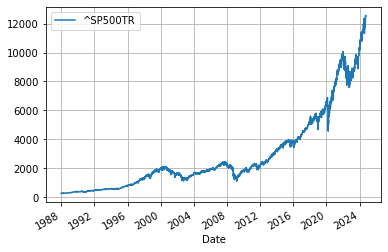

In [18]:
df.plot()
plt.grid()
plt.show()

### Simulate different investments
We simulate different PAC having:
- duration between 1 and 20 years, at intervals of 1 year
- 100 simulations per each duration

In the results are contained (per each duration):
- 1st column, the minimum net return
- 2nd column, the maximum net return
- 3rd column, the median net return
- 4th column, the probability of having a positive return
- 5th column, the probability of having a positive return accounting for the inflation

In [6]:
years_grid = np.arange(1, 20.1, 1)

results = simulate_multiple_durations(data = df,
                                      years_grid = years_grid,
                                      n_simulations = 100)

100%|███████████████████████████████████████████| 20/20 [00:08<00:00,  2.49it/s]


In [24]:
print('Shape of results', results.shape)
print(results.shape[0], 'denotes the number of periods considered in the simulations.')
print(results.shape[1], 'denotes the total number of information for each period.')

Shape of results (20, 5)
20 denotes the number of periods considered in the simulations.
5 denotes the total number of information for each period.


### Show results

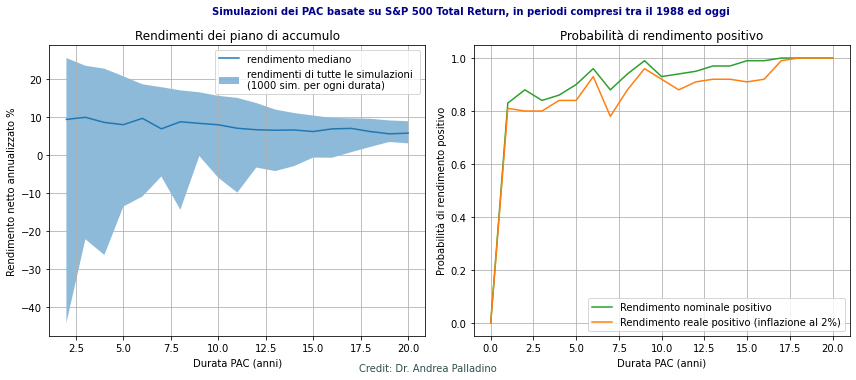

In [12]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(years_grid[1:], results[1:, 2], label='rendimento mediano')
plt.fill_between(years_grid[1:], results[1:, 1], results[1:, 0], alpha=0.5, label='rendimenti di tutte le simulazioni \n(1000 sim. per ogni durata)')
plt.grid()
plt.ylabel('Rendimento netto annualizzato %')
plt.title('Rendimenti dei piano di accumulo')
plt.legend()
plt.xlabel('Durata PAC (anni)')

plt.subplot(1, 2, 2)
plt.plot(np.concatenate([[0], years_grid]),
         np.concatenate([[0], results[:, 3]]), color='C2', label='Rendimento nominale positivo')
plt.plot(np.concatenate([[0], years_grid]),
         np.concatenate([[0], results[:, 4]]), color='C1', label='Rendimento reale positivo (inflazione al 2%)')
plt.grid()
plt.ylabel('Probabilità di rendimento positivo')
plt.legend()
plt.xlabel('Durata PAC (anni)')
plt.title('Probabilità di rendimento positivo')

plt.tight_layout()
fig.text(0.42, 0.02, 'Credit: Dr. Andrea Palladino', color='darkslategrey')
fig.text(0.25, 1.01, 'Simulazioni dei PAC basate su S&P 500 Total Return, in periodi compresi tra il 1988 ed oggi',
        color='darkblue', weight="bold")
#plt.savefig('pac-montecarlo.png', dpi=300, bbox_inches = "tight")
plt.show()

#